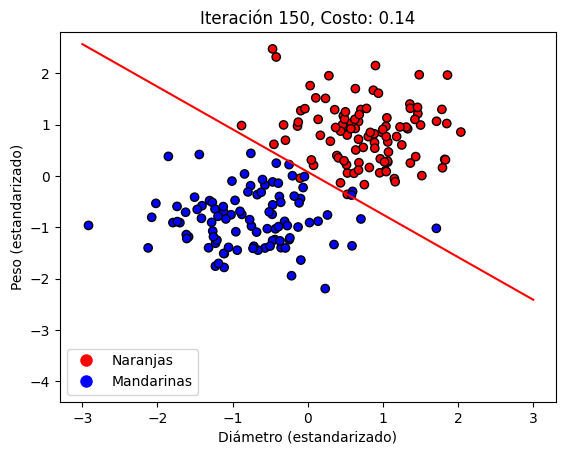

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generar datos ficticios con 7% de solapamiento
np.random.seed(42)
n_samples = 100

# Naranjas: diámetro más grande y peso más alto
naranjas_diametro = np.random.normal(8, 1.2, n_samples)  # Diámetro en cm (mayor desviación para solapamiento)
naranjas_peso = np.random.normal(150, 25, n_samples)     # Peso en gramos (mayor desviación para solapamiento)

# Mandarinas: diámetro más pequeño y peso más bajo
mandarinas_diametro = np.random.normal(5, 1.2, n_samples)  # Diámetro en cm (mayor desviación para solapamiento)
mandarinas_peso = np.random.normal(80, 25, n_samples)      # Peso en gramos (mayor desviación para solapamiento)

# Combinar los datos
X = np.vstack((np.column_stack((naranjas_diametro, naranjas_peso)),
               np.column_stack((mandarinas_diametro, mandarinas_peso))))
X = np.c_[np.ones(X.shape[0]), X]  # Añadir columna de unos para el término de sesgo
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))  # 0: Naranjas, 1: Mandarinas

# Normalizar los datos (escalar características)
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])  # Normalizar diámetro
X[:, 2] = (X[:, 2] - np.mean(X[:, 2])) / np.std(X[:, 2])  # Normalizar peso

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo (entropía cruzada)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))

# Descenso de gradiente
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = []
    theta_history = []
    for _ in range(n_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        cost_history.append(cost_function(X, y, theta))
        theta_history.append(theta.copy())
    return theta, cost_history, theta_history

# Parámetros iniciales
theta = np.ones(X.shape[1])
learning_rate = 0.1
n_iterations = 150

# Ejecutar descenso de gradiente
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

# Crear animación
fig, ax = plt.subplots()
x_vals = np.linspace(-3, 3, 100)  # Rango para datos normalizados
y_vals = -(theta_history[0][0] + theta_history[0][1] * x_vals) / theta_history[0][2]
line, = ax.plot(x_vals, y_vals, color='red', label='Frontera de decisión')

colors = ['red' if val == 0 else 'blue' for val in y]
labels = ['Naranjas', 'Mandarinas']

scatter = ax.scatter(X[:, 1], X[:, 2], c=colors, edgecolors='k')

# Crear leyenda manualmente
from matplotlib.lines import Line2D

ax.set_xlabel('Diámetro (estandarizado)')
ax.set_ylabel('Peso (estandarizado)')
ax.set_title('Optimización de la Regresión Logística con 7% de Solapamiento')
ax.legend()
legend_elements = [Line2D([0], [0], marker='o', color='w', label=labels[0], markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=labels[1], markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements)

def update(frame):
    y_vals = -(theta_history[frame][0] + theta_history[frame][1] * x_vals) / theta_history[frame][2]
    line.set_ydata(y_vals)
    ax.set_title(f"Iteración {frame+1}, Costo: {cost_history[frame]:.2f}")
    return line,

ani = FuncAnimation(fig, update, frames=n_iterations, interval=100, blit=True)

# Guardar el GIF
ani.save('optimizacion_regresion_logistica_solapamiento.gif', writer='pillow')

# Mostrar la animación
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#X=X[:,1:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

# Crear una malla para graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir sobre la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.contourf(xx, yy, np.abs(Z-1), alpha=0.8, cmap=plt.cm.coolwarm)
colors = ['red' if val == 0 else 'blue' for val in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k', marker='o')
plt.xlabel('Diámetro (estandarizado)')
plt.ylabel('Peso (estandarizado)')
plt.title('Clasificación de Naranjas y Mandarinas')
plt.show()


# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Naranjas', 'Mandarinas'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()